# Crank Nicolson method

### Heat equation: metal heated in the middle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Steps:

h = 0.0025 # for space
k = 0.0025 # for time

# Time and Space Vectors
x = np.arange(0, 1 + h, h)

t = np.arange(0, 0.1 + k, k)

print(len(x)) # Matrices should n-2 x n-2 = 39x39 

401


In [3]:
# Boundary conditions

bcs = [0, 0] # Fix temperatures at the edges (T=0)

# Initial conditions

ics = np.sin(np.pi*x)


In [4]:
# Matrix for temperatures

n = len(x)
m = len(t)

T = np.zeros((n,m))

print(T.shape)

(401, 41)


In [5]:
# Add the bcs:

T[0, :] = bcs[0]

T[-1, :] = bcs[1]


# Add the ics

T[:, 0] = ics

#print(T)

In [6]:
c_2 = 1

r_factor = c_2*k/h**2

print(r_factor)

400.0


## First matrix:

In [7]:
D1_matrix_0 = np.diag([2 + 2*r_factor]*(n - 2), 0)

D1_matrix_n = np.diag([-r_factor]*(n - 3), -1)

D1_matrix_p = np.diag([-r_factor]*(n - 3), +1)

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

#print(D1_matrix_0)
print(D1_matrix)
print(D1_matrix.shape)

[[ 802. -400.    0. ...    0.    0.    0.]
 [-400.  802. -400. ...    0.    0.    0.]
 [   0. -400.  802. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...  802. -400.    0.]
 [   0.    0.    0. ... -400.  802. -400.]
 [   0.    0.    0. ...    0. -400.  802.]]
(399, 399)


## Second matrix:

In [8]:
D2_matrix_0 = np.diag([2 - 2*r_factor]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

print(D2_matrix)
print(D2_matrix.shape)

[[-798.  400.    0. ...    0.    0.    0.]
 [ 400. -798.  400. ...    0.    0.    0.]
 [   0.  400. -798. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -798.  400.    0.]
 [   0.    0.    0. ...  400. -798.  400.]
 [   0.    0.    0. ...    0.  400. -798.]]
(399, 399)


### The b vector, vector of known values

In [9]:
a = 2
b = a

b = 3
print(a, b)

2 3


In [10]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T[1:-1, j].copy()
    #print(b.shape)
    #print(b)
    
    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor*(T[0, j+1] + T[0, j])
    b[-1] = b[-1] + r_factor*(T[-1, j+1] + T[-1, j])
    
    # Compute the soution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T[1:-1, j+1] = sln_b
    
#print(T)
    

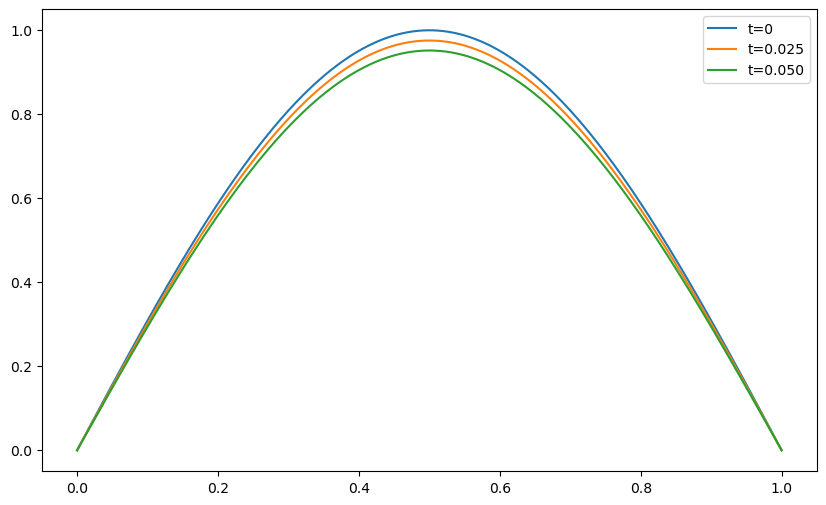

In [11]:
# Plotting
plt.figure(figsize=(10,6))

plt.plot(x, T[:, 0], label = 't=0')

plt.plot(x, T[:, 1], label = 't=0.025')

plt.plot(x, T[:, 2], label = 't=0.050')

plt.legend()
plt.show()

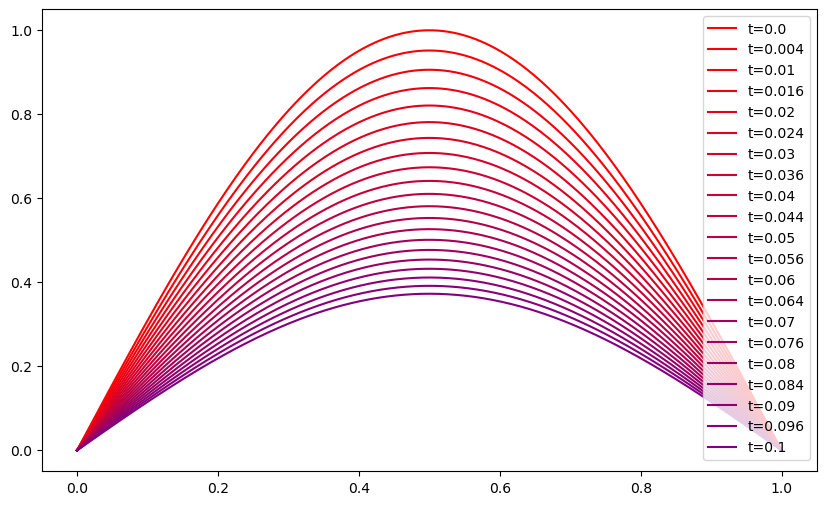

In [12]:
# Plotting
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize=(10,6))

for j in range((m+1)//2):
    plt.plot(x, T[:, 2*j] , color = [R[j], G, B[j]])

plt.legend([f't={2*t_value.round(3)}' for t_value in t])
plt.show()

In [13]:
x_grid, t_grid = np.meshgrid(x, t)

print(x_grid.shape, t_grid.shape, T.shape)

(41, 401) (41, 401) (401, 41)


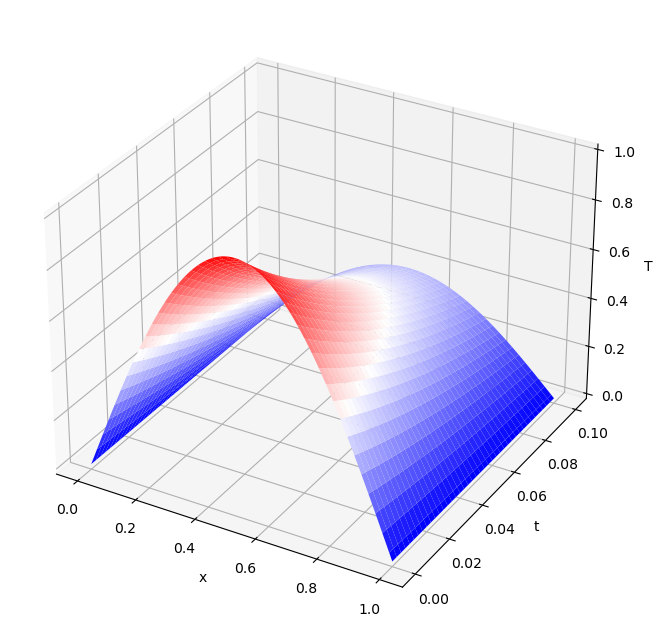

In [14]:

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, T.T, cmap='bwr') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel('T')

plt.show()



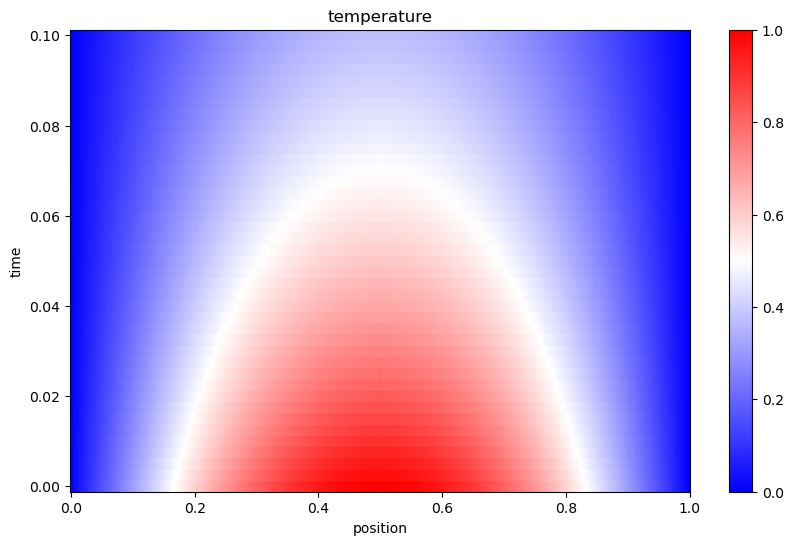

In [15]:
plt.figure(figsize=(10,6))

Z1 = plt.pcolor(x_grid, t_grid, T.T, cmap = 'bwr')

plt.xlabel("position")

plt.ylabel("time")

plt.title("temperature")

plt.colorbar(Z1)

plt.show()